In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1536, 2048, 3)


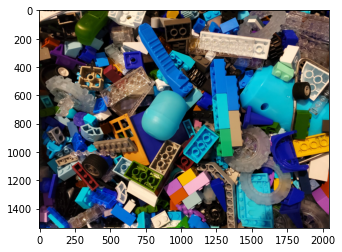

In [5]:
image = cv2.imread('Images/1.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

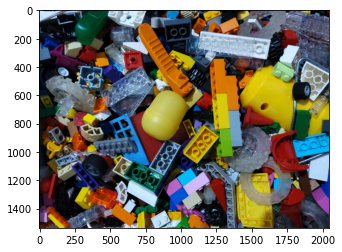

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

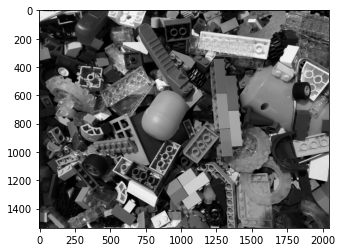

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

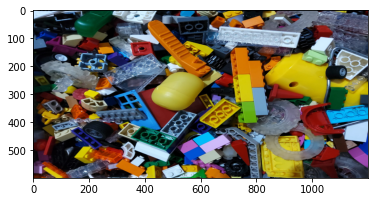

In [8]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [20]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [21]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [23]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
print(modified_image)

[[201 228 255]
 [201 228 255]
 [201 228 255]
 ...
 [ 32  36  47]
 [ 34  38  49]
 [ 32  36  47]]


In [30]:
clf = KMeans(n_clusters = 5)
print (clf)
labels = clf.fit_predict(modified_image)
print (labels)

KMeans(n_clusters=5)
[0 0 0 ... 1 1 1]


Label Count is: Counter({1: 79095, 3: 59473, 2: 41370, 4: 31712, 0: 28350})
Centered Color: [[173.08855215 195.31856875 214.06163682]
 [ 21.94293269  25.75437398  29.67305527]
 [192.41081133 159.15142146  24.1284027 ]
 [ 83.14399852 108.50045415 136.34271345]
 [120.81399226  50.00434112  22.8616188 ]]
Ordered Color: [array([173.08855215, 195.31856875, 214.06163682]), array([ 83.14399852, 108.50045415, 136.34271345]), array([21.94293269, 25.75437398, 29.67305527]), array([120.81399226,  50.00434112,  22.8616188 ]), array([192.41081133, 159.15142146,  24.1284027 ])]
Hex Color: ['#adc3d6', '#783216', '#536c88', '#c09f18', '#15191d']
RGB Color: [array([173.08855215, 195.31856875, 214.06163682]), array([120.81399226,  50.00434112,  22.8616188 ]), array([ 83.14399852, 108.50045415, 136.34271345]), array([192.41081133, 159.15142146,  24.1284027 ]), array([21.94293269, 25.75437398, 29.67305527])]


SyntaxError: 'return' outside function (Temp/ipykernel_24076/2542043941.py, line 22)

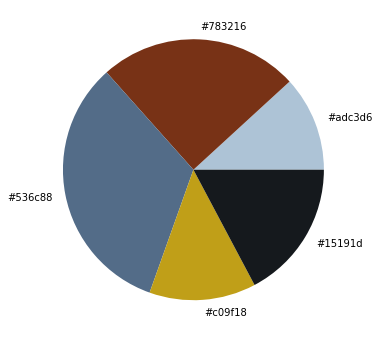

In [31]:
counts = Counter(labels)
print ("Label Count is: {}".format(counts))

center_colors = clf.cluster_centers_
print ("Centered Color: {}".format(center_colors))

# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
print ("Ordered Color: {}".format(ordered_colors))

hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
print ("Hex Color: {}".format(hex_colors))

rgb_colors = [ordered_colors[i] for i in counts.keys()]
print ("RGB Color: {}".format(rgb_colors))

show_chart = True
if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

return rgb_colors